In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split
from classication_class import CustomClassifier
from sklearn.metrics import accuracy_score, precision_score

1. Create a classifier to predict the event (build a classifier)
2. What are the characteristics of each User Segment
3. Propose methods to get back active/dormant users

Unbalanced data!!!!!!! - how can we solve it?

In [2]:
input_data = pd.read_csv("data/CTM_DataScientistCaseStudy.csv", index_col=False)
print(input_data.shape)

(100000, 6)


In [35]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   UserID       100000 non-null  int64 
 1   Age          100000 non-null  int64 
 2   UserSegment  99507 non-null   object
 3   Recency      99507 non-null   object
 4   PriorEvent   100000 non-null  int64 
 5   Event        100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


In [39]:
input_data = input_data.dropna(subset = ['UserSegment', 'Recency'])
print(input_data.shape)

(99507, 6)


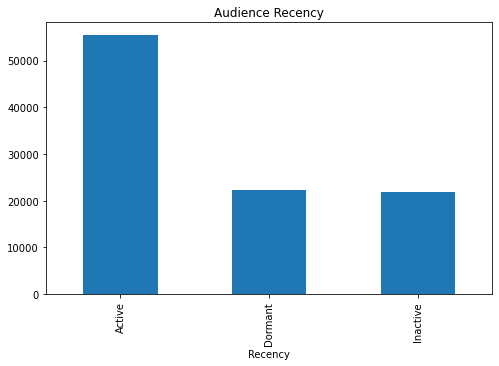

In [53]:
input_data.groupby(['Recency'])['UserID'].count().plot.bar(title = "Audience Recency", figsize = [8, 5])

In [46]:
if input_data[input_data['UserID'].isnull()].shape[0] == 0:
    print("There are no nulls in the key of the table")
else:
    print("There are nulls in the ID column")

There are no nulls in the key of the table


18 75


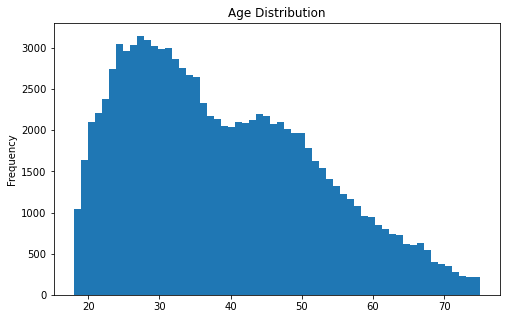

In [54]:
print(input_data['Age'].min(), input_data['Age'].max())
input_data['Age'].plot.hist(bins = 58, figsize = [8, 5], title = "Age Distribution")

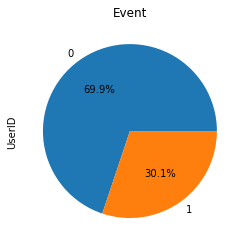

In [62]:
event_grouped = input_data.groupby(['Event'])['UserID'].count()
event_grouped = event_grouped/event_grouped.sum()
event_grouped.plot.pie(y = 'UserID', autopct='%1.1f%%', title= "Event")

In [8]:
input_data.groupby(['PriorEvent', 'Event'])['UserID'].count()

PriorEvent  Event
0           0        67398
            1        23424
1           0         2602
            1         6576
Name: UserID, dtype: int64

# Classify an event

In [9]:
import importlib
import one_hot_encoding
importlib.reload(one_hot_encoding)

<module 'one_hot_encoding' from '/Users/kleomeniskogias/DataspellProjects/Mycodes/BGL/one_hot_encoding.py'>

In [10]:
from one_hot_encoding import encode_categorical_variable

In [11]:
X = input_data[['UserID', 'Age', 'PriorEvent']].set_index('UserID')
y = input_data[['UserID', 'Event']].set_index('UserID')

user_segment_encoded  = encode_categorical_variable(input_data, 'UserSegment', 'UserID')
recency_encoded = encode_categorical_variable(input_data, 'Recency', 'UserID')
X = X.join(user_segment_encoded).join(recency_encoded)
X

,Age,PriorEvent,UserSegment_A,UserSegment_B,UserSegment_C,Recency_Active,Recency_Dormant,Recency_Inactive
UserID,,,,,,,,
1,56,0,1,0,0,0,0,1
2,39,0,1,0,0,0,0,1
3,62,1,1,0,0,1,0,0
4,29,0,0,0,1,0,0,1
5,41,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
99996,43,0,0,0,1,1,0,0
99997,58,0,0,0,1,1,0,0
99998,70,0,1,0,0,1,0,0


In [12]:
print(X.shape, y.shape)

(100000, 8) (100000, 1)


In [13]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(60000, 8) (20000, 8) (20000, 8) (60000, 1) (20000, 1) (20000, 1)


In [14]:
# import importlib
# import classication_class
# importlib.reload(classication_class)

/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<module 'classication_class' from '/Users/kleomeniskogias/DataspellProjects/Mycodes/BGL/classication_class.py'>

In [16]:
# Random Forest
classifiers_outputs = {}
rf = CustomClassifier("RF")
rf.set_train_and_test_data(X_train, X_val, y_train, y_val)
# rf.split_to_train_and_test_set(X, y, test_size=0.4)
rf.fit_model()

classifiers_outputs["RF"] = rf.estimate_accuracy()
rf.estimate_precision()
rf.estimate_f1_score()

# Logistic Regression
lr = CustomClassifier("LR")
lr.set_train_and_test_data(rf.X_train, rf.X_test, rf.y_train, rf.y_test)
lr.fit_model()

lr.estimate_accuracy()
lr.estimate_precision()
lr.estimate_f1_score()

# XGBoost
xgb = CustomClassifier("XGBoost")
xgb.set_train_and_test_data(rf.X_train, rf.X_test, rf.y_train, rf.y_test)
xgb.fit_model()
xgb.estimate_accuracy()
xgb.estimate_precision()
xgb.estimate_f1_score()

RF


/Users/kleomeniskogias/DataspellProjects/Mycodes/BGL/classication_class.py:70: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.classifier.fit(self.X_train, self.y_train)


Accuracy of RF classifier on test set: 0.7466
Precision of RF classifier on test set: 0.7299
F1-score (unweighted) of RF classifier on test set: 0.6430
F1-score (weigthed) of RF classifier on test set: 0.7196
LR


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

Accuracy of LR classifier on test set: 0.6634
Precision of LR classifier on test set: 0.7094
F1-score (unweighted) of LR classifier on test set: 0.6368
F1-score (weigthed) of LR classifier on test set: 0.6760
XGBoost
[21:35:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.7484
Precision of XGBoost classifier on test set: 0.7322
F1-score (unweighted) of XGBoost classifier on test set: 0.6469
F1-score (weigthed) of XGBoost classifier on test set: 0.7223


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [55]:
# Results formatted
classifiers_list = [rf, lr, xgb]
classifiers_outputs = pd.DataFrame(columns = ["RF", "LR", "XGBoost"], index = ["Accuracy" , "Precision", "F1_score unweighted", "F1_score weighted"])
for classifier in classifiers_list:
    classifiers_outputs.loc['Accuracy', classifier.model] = round(classifier.accuracy, 3)
    classifiers_outputs.loc['Precision', classifier.model] = round(classifier.precision, 3)
    classifiers_outputs.loc['F1_score unweighted', classifier.model] = round(classifier.f1_score_macro, 3)
    classifiers_outputs.loc['F1_score weighted', classifier.model] = round(classifier.f1_score_weighted, 3)

classifiers_outputs.T#.to_clipboard()

# XGBoost hyperparameters tuning

In [18]:
split_index = [-1 if x in xgb.X_train.index else 0 for x in X_train.append(X_val).index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)
print(len(split_index))

/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_58520/1180843036.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  split_index = [-1 if x in xgb.X_train.index else 0 for x in X_train.append(X_val).index]


In [20]:
xgb.classifier.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)>

In [21]:
parameters = {
    'max_depth': [3, 10, 50],#range (3, 10, 50),
    'n_estimators': [50, 200, 500],#range(50, 200, 500),
    'learning_rate': [0.05, 0.1, 1]
}

In [22]:
grid_search = GridSearchCV(
    estimator=xgb.classifier,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 1,
    cv = pds,
    verbose=10
)

In [42]:
%%time
grid_search.fit(X, y)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
[CV 1/1; 1/27] START learning_rate=0.05, max_depth=3, n_estimators=50...........
[20:42:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 1/27] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.769 total time=   0.5s
[CV 1/1; 2/27] START learning_rate=0.05, max_depth=3, n_estimators=200..........
[20:42:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 2/27] END learning_rate=0.05, max_depth=3, n_estimators=200;, score=0.769 total time=   1.8s
[CV 1/1; 3/27] START learning_rate=0.05, max_depth=3, n_estimators=500..........
[20:42:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 3/27] END learning_rate=0.05, max_depth=3, n_estimators=500;, score=0.769 total time=   4.0s
[CV 1/1; 4/27] START learning_rate=0.05, max_depth=10, n_estimators=50..........
[20:42:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 4/27] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.767 total time=   1.6s
[CV 1/1; 5/27] START learning_rate=0.05, max_depth=10, n_estimators=200.........
[20:42:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 5/27] END learning_rate=0.05, max_depth=10, n_estimators=200;, score=0.762 total time=   5.3s
[CV 1/1; 6/27] START learning_rate=0.05, max_depth=10, n_estimators=500.........
[20:42:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 6/27] END learning_rate=0.05, max_depth=10, n_estimators=500;, score=0.763 total time=  13.7s
[CV 1/1; 7/27] START learning_rate=0.05, max_depth=50, n_estimators=50..........
[20:43:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 7/27] END learning_rate=0.05, max_depth=50, n_estimators=50;, score=0.762 total time=   2.0s
[CV 1/1; 8/27] START learning_rate=0.05, max_depth=50, n_estimators=200.........
[20:43:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 8/27] END learning_rate=0.05, max_depth=50, n_estimators=200;, score=0.762 total time=  12.3s
[CV 1/1; 9/27] START learning_rate=0.05, max_depth=50, n_estimators=500.........
[20:43:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 9/27] END learning_rate=0.05, max_depth=50, n_estimators=500;, score=0.762 total time=  36.6s
[CV 1/1; 10/27] START learning_rate=0.1, max_depth=3, n_estimators=50...........
[20:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 10/27] END learning_rate=0.1, max_depth=3, n_estimators=50;, score=0.769 total time=   0.4s
[CV 1/1; 11/27] START learning_rate=0.1, max_depth=3, n_estimators=200..........
[20:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 11/27] END learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.769 total time=   1.6s
[CV 1/1; 12/27] START learning_rate=0.1, max_depth=3, n_estimators=500..........
[20:43:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 12/27] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.768 total time=   4.0s
[CV 1/1; 13/27] START learning_rate=0.1, max_depth=10, n_estimators=50..........
[20:44:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 13/27] END learning_rate=0.1, max_depth=10, n_estimators=50;, score=0.765 total time=   1.3s
[CV 1/1; 14/27] START learning_rate=0.1, max_depth=10, n_estimators=200.........
[20:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 14/27] END learning_rate=0.1, max_depth=10, n_estimators=200;, score=0.765 total time=   6.3s
[CV 1/1; 15/27] START learning_rate=0.1, max_depth=10, n_estimators=500.........
[20:44:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 15/27] END learning_rate=0.1, max_depth=10, n_estimators=500;, score=0.765 total time=  14.1s
[CV 1/1; 16/27] START learning_rate=0.1, max_depth=50, n_estimators=50..........
[20:44:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 16/27] END learning_rate=0.1, max_depth=50, n_estimators=50;, score=0.762 total time=   2.8s
[CV 1/1; 17/27] START learning_rate=0.1, max_depth=50, n_estimators=200.........
[20:44:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 17/27] END learning_rate=0.1, max_depth=50, n_estimators=200;, score=0.762 total time=  13.3s
[CV 1/1; 18/27] START learning_rate=0.1, max_depth=50, n_estimators=500.........
[20:44:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 18/27] END learning_rate=0.1, max_depth=50, n_estimators=500;, score=0.763 total time=  39.8s
[CV 1/1; 19/27] START learning_rate=1, max_depth=3, n_estimators=50.............
[20:45:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 19/27] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.767 total time=   0.5s
[CV 1/1; 20/27] START learning_rate=1, max_depth=3, n_estimators=200............
[20:45:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 20/27] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.767 total time=   1.8s
[CV 1/1; 21/27] START learning_rate=1, max_depth=3, n_estimators=500............
[20:45:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 21/27] END learning_rate=1, max_depth=3, n_estimators=500;, score=0.766 total time=   4.7s
[CV 1/1; 22/27] START learning_rate=1, max_depth=10, n_estimators=50............
[20:45:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 22/27] END learning_rate=1, max_depth=10, n_estimators=50;, score=0.763 total time=   1.3s
[CV 1/1; 23/27] START learning_rate=1, max_depth=10, n_estimators=200...........
[20:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 23/27] END learning_rate=1, max_depth=10, n_estimators=200;, score=0.764 total time=   5.6s
[CV 1/1; 24/27] START learning_rate=1, max_depth=10, n_estimators=500...........
[20:45:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 24/27] END learning_rate=1, max_depth=10, n_estimators=500;, score=0.764 total time=  14.9s
[CV 1/1; 25/27] START learning_rate=1, max_depth=50, n_estimators=50............
[20:45:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 25/27] END learning_rate=1, max_depth=50, n_estimators=50;, score=0.763 total time=   4.2s
[CV 1/1; 26/27] START learning_rate=1, max_depth=50, n_estimators=200...........
[20:45:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 26/27] END learning_rate=1, max_depth=50, n_estimators=200;, score=0.764 total time=  14.7s
[CV 1/1; 27/27] START learning_rate=1, max_depth=50, n_estimators=500...........
[20:46:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[CV 1/1; 27/27] END learning_rate=1, max_depth=50, n_estimators=500;, score=0.763 total time=  30.5s
[20:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: user 18min 19s, sys: 2min 45s, total: 21min 5s
Wall time: 4min


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missi...,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                              

In [44]:
print(grid_search.best_params_)
print(grid_search.best_score_)
# print(grid_search.cv_results_)

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
0.76935


# Results on Test set

In [79]:
# import importlib
# import classication_class
# importlib.reload(classication_class)
# from classication_class import CustomClassifier

In [80]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [81]:
xgb_final = CustomClassifier("XGBoost")
xgb_final.set_train_and_test_data(X_train.append(X_val), X_test, y_train.append(y_val), y_test)
# xgb.set_train_and_test_data(rf.X_train, rf.X_test, rf.y_train, rf.y_test)
xgb_final.fit_model(learning_rate = 0.05, max_depth = 3, n_estimators =  50)
xgb_final.estimate_accuracy()
xgb_final.estimate_precision()
xgb_final.estimate_f1_score()

/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_58520/2245852611.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xgb_final.set_train_and_test_data(X_train.append(X_val), X_test, y_train.append(y_val), y_test)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_58520/2245852611.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xgb_final.set_train_and_test_data(X_train.append(X_val), X_test, y_train.append(y_val), y_test)
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as int

XGBoost
[00:31:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.7540
Precision of XGBoost classifier on test set: 0.7390
F1-score (unweighted) of XGBoost classifier on test set: 0.6451
F1-score (weigthed) of XGBoost classifier on test set: 0.7253


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


# Feature Importance

In [82]:
xgb_final.estimate_feature_importance()

,Feature,Significance
5,Recency_Active,0.389936
1,PriorEvent,0.267324
4,UserSegment_C,0.138300
2,UserSegment_A,0.114177
0,Age,0.040698
7,Recency_Inactive,0.039421
6,Recency_Dormant,0.008608
3,UserSegment_B,0.001537


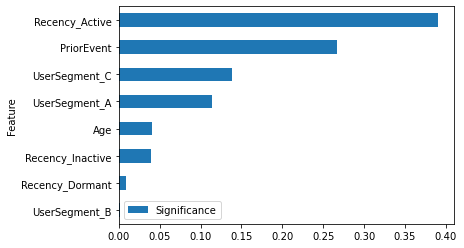

In [83]:
xgb_final.estimate_feature_importance().sort_values('Significance').plot.barh(x= 'Feature', y = 'Significance')

# Classification certainty
The probability output that the classifier provides

In [84]:
# Add index to predictions
xgb_final.add_index_to_predictions("Predictions")
xgb_final.y_pred

# Estimate label probability
labels_dict = {0 : 'Event 0', 1 : 'Event 1'}
xgb_final.set_labels_dict(labels_dict)
xgb_final.estimate_label_probability('UserID')

,Predictions
UserID,
4998,1
599,0
29683,0
9411,0
75281,0
...,...
61391,0
19610,0
12451,1


In [96]:
threshold_df = xgb_final.label_probability_df.join(xgb_final.y_test)
threshold_df

,Event 0,Event 1,Event
UserID,,,
4998,0.286534,0.713466,1
599,0.500131,0.499869,1
29683,0.830357,0.169643,1
9411,0.825099,0.174901,0
75281,0.809094,0.190906,0
...,...,...,...
61391,0.701980,0.298020,1
19610,0.813708,0.186292,0
12451,0.491061,0.508939,0


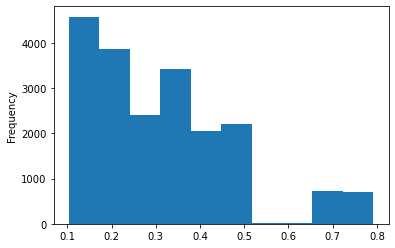

In [144]:
threshold_df['Event 1'].plot.hist()

# Threshold Experimentation

In [106]:
threshold_results = pd.DataFrame(index = range(1,100), columns = ['Accuracy', 'Precision'])

for i in range(1,100):
    # print(i/100)
    threshold_df['Prediction'] = threshold_df['Event 1'].apply(lambda x: 1 if x >= i/100 else 0)
    accuracy = accuracy_score(threshold_df['Event'], threshold_df['Prediction'])
    precision = precision_score(threshold_df['Event'], threshold_df['Prediction'])
    threshold_results.loc[i, 'Accuracy'] = accuracy
    threshold_results.loc[i, 'Precision'] = precision

threshold_results

/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

,Accuracy,Precision
1,0.2961,0.2961
2,0.2961,0.2961
3,0.2961,0.2961
4,0.2961,0.2961
5,0.2961,0.2961
...,...,...
95,0.7039,0.0
96,0.7039,0.0
97,0.7039,0.0
98,0.7039,0.0


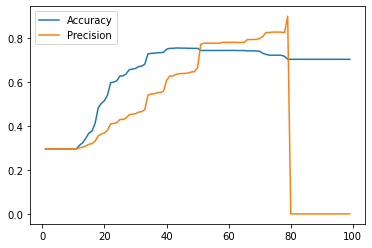

In [107]:
threshold_results.plot.line()

# Results per segment

In [112]:
results_df = xgb_final.y_pred.join(xgb_final.y_test).join(xgb_final.X_test)
results_df

,Predictions,Event,Age,PriorEvent,UserSegment_A,UserSegment_B,UserSegment_C,Recency_Active,Recency_Dormant,Recency_Inactive
UserID,,,,,,,,,,
4998,1,1,27,1,0,1,0,1,0,0
599,0,1,48,0,1,0,0,1,0,0
29683,0,1,46,0,0,0,1,0,1,0
9411,0,0,65,0,0,1,0,0,0,1
75281,0,0,55,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
61391,0,1,61,0,0,1,0,1,0,0
19610,0,0,43,0,0,1,0,0,1,0
12451,1,0,29,0,1,0,0,1,0,0


In [125]:
scores_per_segment = pd.DataFrame(index = ['Accuracy', 'Precision'], columns = ['UserSegment_A', 'UserSegment_B', 'UserSegment_C'])
for segment in ['UserSegment_A', 'UserSegment_B', 'UserSegment_C']:
    results_per_segment = results_df[results_df[segment] == 1]
    print(segment)
    print(results_per_segment.shape)
    accuracy = accuracy_score(results_per_segment['Event'], results_per_segment['Predictions'])
    precision = precision_score(results_per_segment['Event'], results_per_segment['Predictions'])
    scores_per_segment.loc['Accuracy', segment] = accuracy
    scores_per_segment.loc['Precision', segment] = precision

scores_per_segment

UserSegment_A
(4210, 10)
UserSegment_B
(3860, 10)
UserSegment_C
(11825, 10)


,UserSegment_A,UserSegment_B,UserSegment_C
Accuracy,0.64323,0.712176,0.80482
Precision,0.645486,0.72541,0.737945


In [140]:
xgb_final.classifier.predict_proba(xgb_final.X_test)

/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([[0.28653413, 0.71346587],
       [0.500131  , 0.49986902],
       [0.83035713, 0.16964285],
       ...,
       [0.49106103, 0.50893897],
       [0.828392  , 0.17160794],
       [0.66607034, 0.33392966]], dtype=float32)

/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


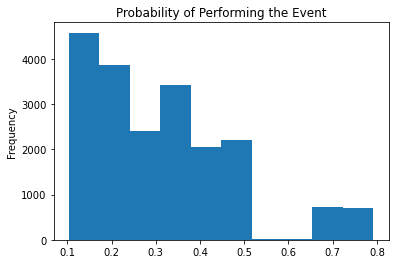

In [150]:
pd.Series(xgb_final.classifier.predict_proba(xgb_final.X_test)[:,1]).plot.hist(title = "Probability of Performing the Event")

In [ ]:
# Results per segment

In [154]:
# Do the predictions with the threshold that we found
pred_with_new_threshold = (xgb_final.classifier.predict_proba(xgb_final.X_test)[:,1]>=0.65).astype(int)
y_pred_with_new_threshold = pd.DataFrame(data = zip(list(X_test.reset_index()['UserID']), list(pred_with_new_threshold)),
                      columns = ['UserID', "Predictions with new threshold"]).set_index('UserID')
y_pred_with_new_threshold

# Results dataframe with new threshold
results_df_with_new_threshold = y_pred_with_new_threshold.join(xgb_final.y_test).join(xgb_final.X_test)
results_df_with_new_threshold

scores_per_segment_with_new_threshold = pd.DataFrame(index = ['Accuracy', 'Precision'], columns = ['UserSegment_A', 'UserSegment_B', 'UserSegment_C'])
for segment in ['UserSegment_A', 'UserSegment_B', 'UserSegment_C']:
    results_per_segment = results_df_with_new_threshold[results_df_with_new_threshold[segment] == 1]
    print(segment)
    print(results_per_segment.shape)
    accuracy = accuracy_score(results_per_segment['Event'], results_per_segment['Predictions with new threshold'])
    precision = precision_score(results_per_segment['Event'], results_per_segment['Predictions with new threshold'])
    scores_per_segment_with_new_threshold.loc['Accuracy', segment] = accuracy
    scores_per_segment_with_new_threshold.loc['Precision', segment] = precision

scores_per_segment_with_new_threshold.to_clipboard()

UserSegment_A
(4210, 10)
UserSegment_B
(3860, 10)
UserSegment_C
(11825, 10)


/Users/kleomeniskogias/opt/anaconda3/envs/classifiers/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [149]:
results_df_with_new_threshold['Predictions with new threshold'].value_counts()

0    18579
1     1421
Name: Predictions with new threshold, dtype: int64